### Example of Pecu

In [89]:
import pandas as pd
from collections import defaultdict 

# Load the CSV file to check its content
df = pd.read_csv('persona.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()

,id,原文,標籤
0,1,大家好，我是一個充滿好奇心和熱情的人。我喜歡挑戰自己，探索未知領域。我是一位藝術愛好者，喜歡...,"藝術愛好者, 運動愛好者, 探索未知領域"
1,2,嗨，大家好！我是一個熱愛交流和建立連結的人。我喜歡與不同背景和文化的人交流，從中學習新的觀點...,交流和建立連結、音樂、科技、旅行
2,3,大家好，我是一個富有創造力和決心的人。我喜歡挑戰傳統，尋找新的解決方案和機會。我是一個藝術家...,創造力、挑戰傳統、藝術、創業、社會變革
3,4,嗨，大家好！我是一個喜歡冒險和探索的人。我喜歡挑戰自己，突破舒適圈，勇於嘗試新的事物。我是一...,冒險和探索、自然愛好者、社區建設、志願服務、學習和成長
4,5,大家好，我是一個充滿熱情和正能量的人。我喜歡將我的能量和激情帶給身邊的人，讓他們感受到生活的...,音樂愛好者、彈奏吉他、創作音樂、動物愛護者、參與動物保護活動


In [90]:
# 處理標籤欄位，確保每個關鍵字都被正確的分割為獨立的節點
df['標籤'] = df['標籤'].str.replace('、', ',').str.split(',')

# 創建關鍵字與ID之間的映射對照表
keyword_to_ids = defaultdict(list)
id_to_keywords = defaultdict(list)

for index, row in df.iterrows():
    id = row['id']
    id_to_keywords[id].append
    keywords = [keyword.strip() for keyword in row['標籤']]
    for keyword in keywords:
        keyword_to_ids[keyword].append(id)

In [91]:
keyword_to_ids

defaultdict(list,
            {'藝術愛好者': [1],
             '運動愛好者': [1],
             '探索未知領域': [1],
             '交流和建立連結': [2],
             '音樂': [2],
             '科技': [2, 10],
             '旅行': [2, 14],
             '創造力': [3],
             '挑戰傳統': [3],
             '藝術': [3],
             '創業': [3],
             '社會變革': [3],
             '冒險和探索': [4],
             '自然愛好者': [4],
             '社區建設': [4],
             '志願服務': [4],
             '學習和成長': [4],
             '音樂愛好者': [5],
             '彈奏吉他': [5],
             '創作音樂': [5],
             '動物愛護者': [5],
             '參與動物保護活動': [5],
             '廚藝愛好者': [6],
             '探索生活的各個方面': [6],
             '閱讀和了解不同文化背景的故事': [6],
             '分享笑容和快樂': [6],
             '尊重和包容每一個人': [6],
             '挑戰自我的精神': [7],
             '運動競技': [7],
             '數據分析和趨勢探索': [7],
             '成長和進步': [7],
             '持續學習和提升': [7],
             '幫助他人': [8],
             '社區服務和慈善活動': [8],
             '心理諮詢': [8],
             '關愛和支

In [92]:
import networkx as nx
import matplotlib.pyplot as plt

# 使用 networkx
G = nx.Graph()

# 加點
for id in id_to_keywords:
    G.add_node(id, type='id')
for keyword in keyword_to_ids:
    G.add_node(keyword, type='keyword')

# 加邊
for keyword, ids in keyword_to_ids.items():
    for id in ids:
        G.add_edge(id, keyword)

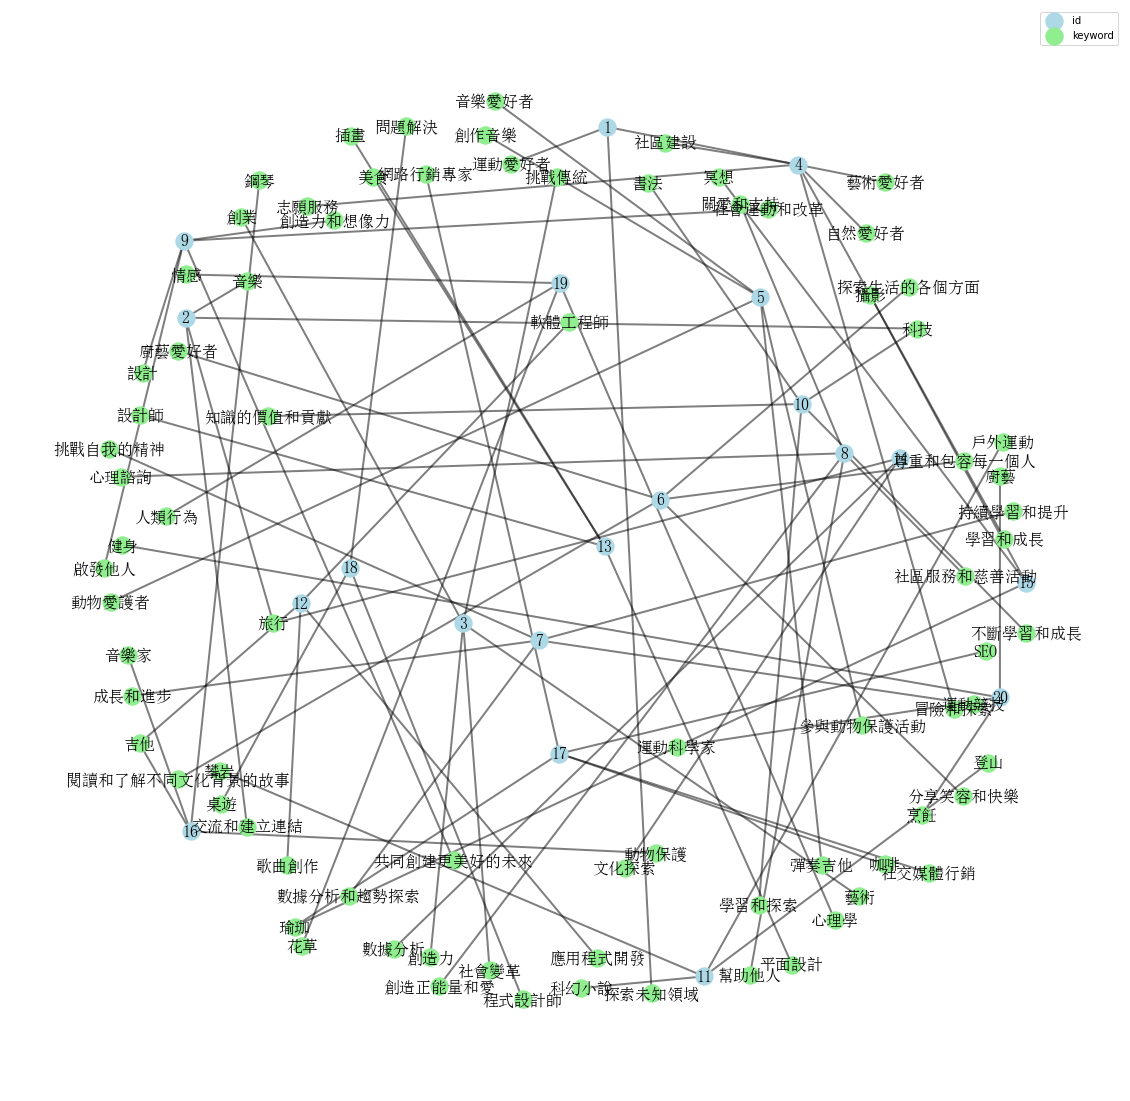

In [93]:
# 畫圖
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=1, iterations=40)
nx.draw_networkx_nodes(G, pos, nodelist=id_to_keywords.keys(), node_color='lightblue', label='id')
nx.draw_networkx_nodes(G, pos, nodelist=keyword_to_ids.keys(), node_color='lightgreen', label='keyword')
nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=16, font_family='SimSun')

plt.axis('off')
plt.legend(scatterpoints=1)
plt.show()

!pip install -U python-louvain

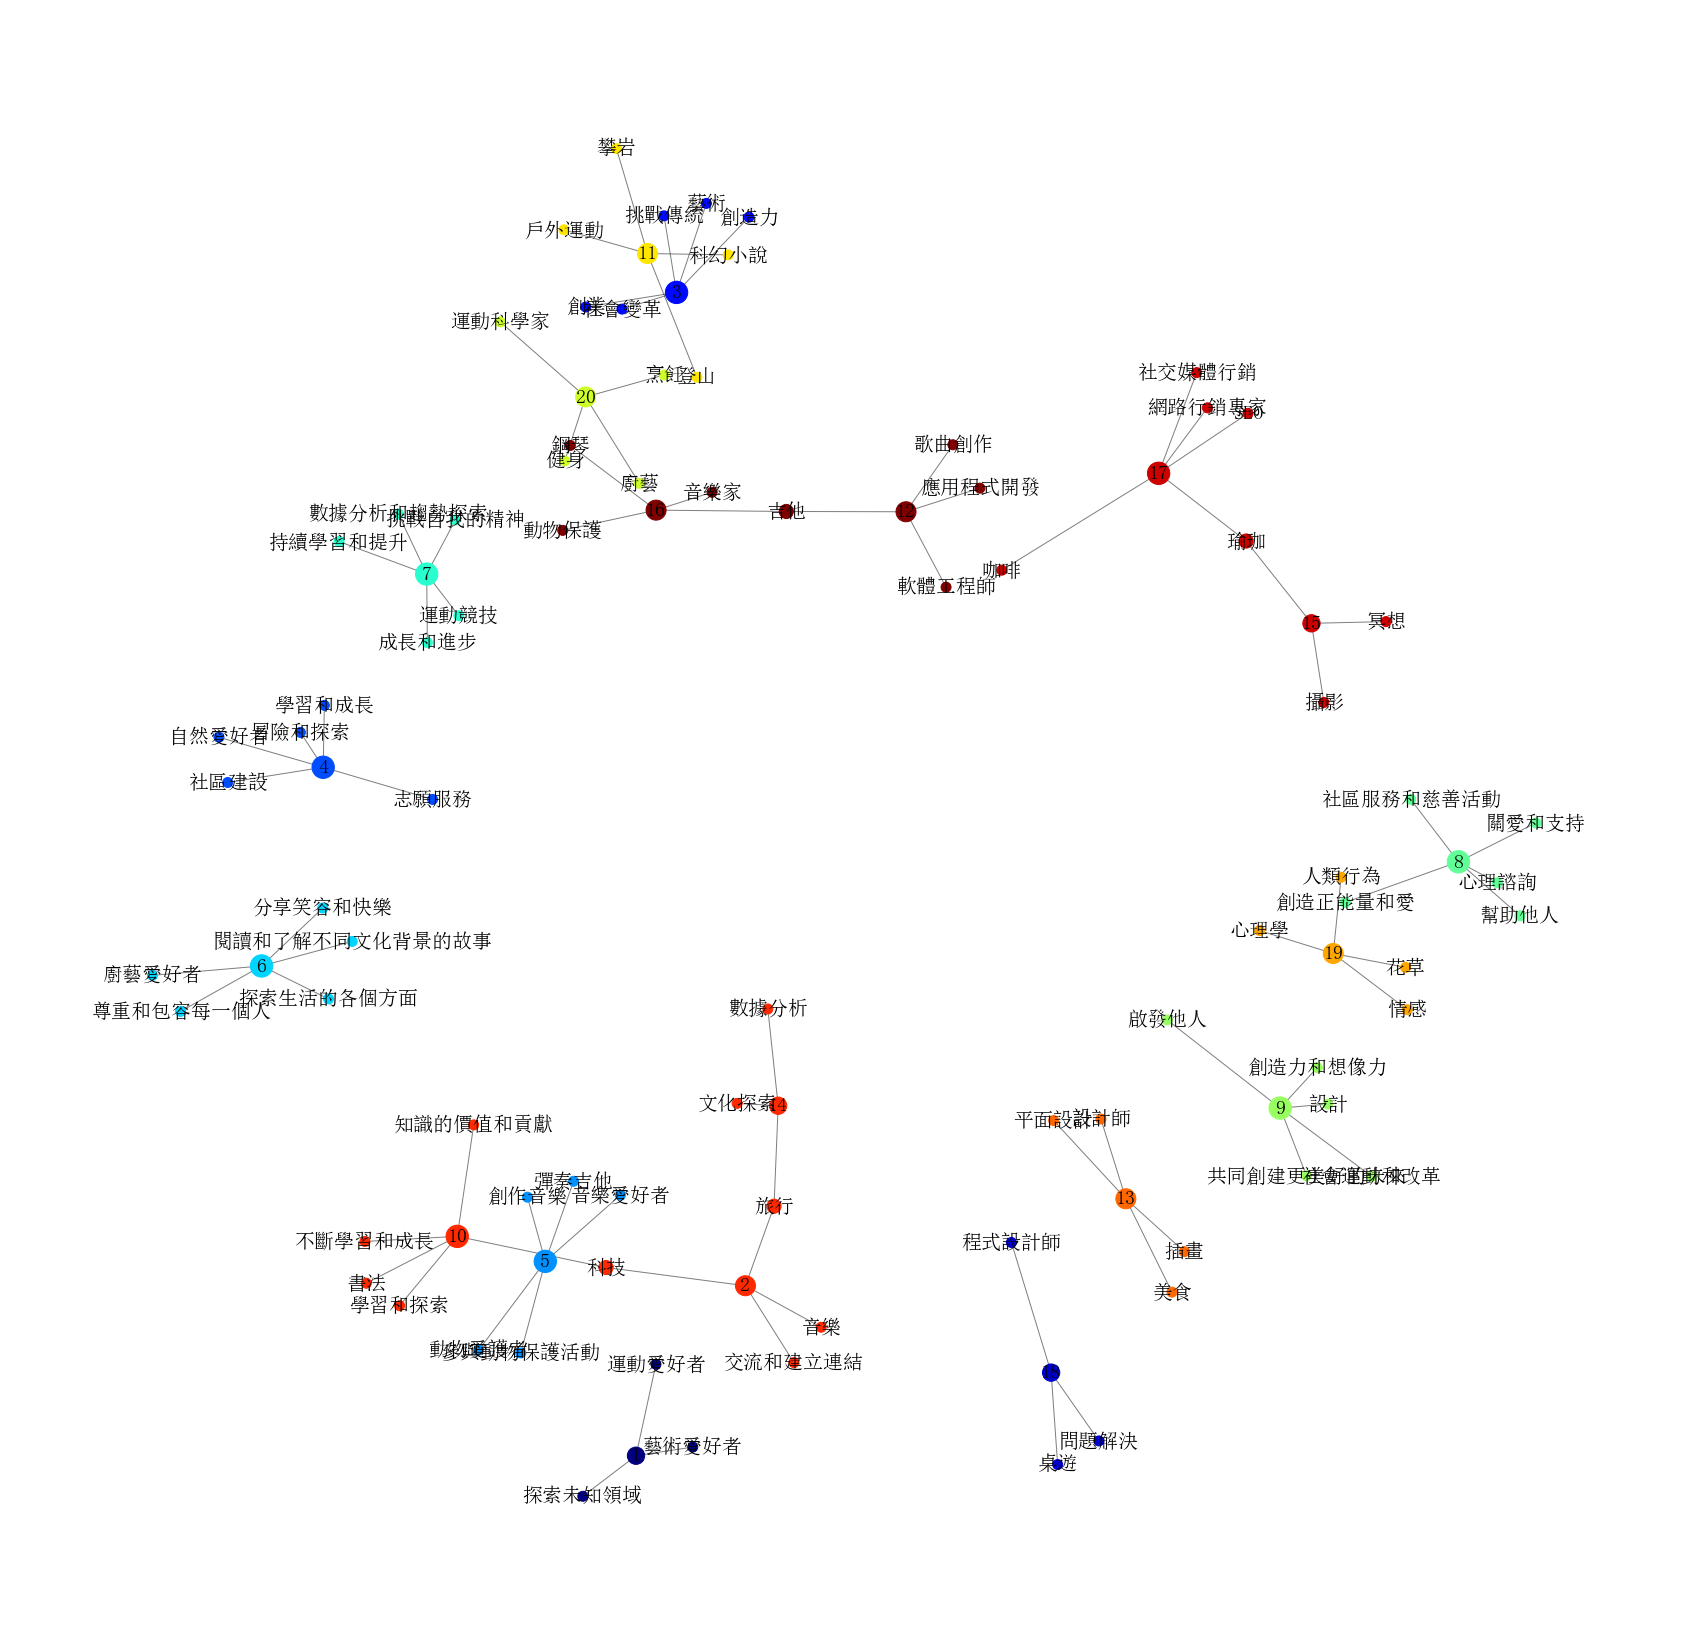

In [94]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

partition = community_louvain.best_partition(G)

community_colors = {node: partition[node] for node in G.nodes()}
values = [community_colors[node] for node in G.nodes()]

node_sizes = [100 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.15, iterations=40) 

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=values, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='SimSun')

plt.axis('off')
plt.show()

###  Going to make Difference
### 想分類成大領域讓大家不會是因為單一技能有連結
> e.g 吉他-音樂-鋼琴

#### 先做其中一個例子

In [64]:
import pandas as pd
from collections import defaultdict 

# Load the CSV file to check its content
df = pd.read_csv('persona.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()

,id,原文,標籤
0,1,大家好，我是一個充滿好奇心和熱情的人。我喜歡挑戰自己，探索未知領域。我是一位藝術愛好者，喜歡...,藝術愛好者、運動愛好者、 探索未知領域
1,2,嗨，大家好！我是一個熱愛交流和建立連結的人。我喜歡與不同背景和文化的人交流，從中學習新的觀點...,交流和建立連結、音樂、科技、旅行
2,3,大家好，我是一個富有創造力和決心的人。我喜歡挑戰傳統，尋找新的解決方案和機會。我是一個藝術家...,創造力、挑戰傳統、藝術、創業、社會變革
3,4,嗨，大家好！我是一個喜歡冒險和探索的人。我喜歡挑戰自己，突破舒適圈，勇於嘗試新的事物。我是一...,冒險和探索、自然愛好者、社區建設、志願服務、學習和成長
4,5,大家好，我是一個充滿熱情和正能量的人。我喜歡將我的能量和激情帶給身邊的人，讓他們感受到生活的...,音樂愛好者、彈奏吉他、創作音樂、動物愛護者、參與動物保護活動


In [65]:
# 處理標籤欄位，確保每個關鍵字都被正確的分割為獨立的節點
df['標籤'] = df['標籤'].str.replace('、', ',').str.split(',')

# 創建關鍵字與ID之間的映射對照表
keyword_to_ids = defaultdict(list)
id_to_keywords = defaultdict(list)

for index, row in df.iterrows():
    id = row['id']
    id_to_keywords[id].append
    keywords = [keyword.strip() for keyword in row['標籤']]
    for keyword in keywords:
        keyword_to_ids[keyword].append(id)

In [66]:
keyword_to_ids

defaultdict(list,
            {'藝術愛好者': [1],
             '運動愛好者': [1],
             '探索未知領域': [1],
             '交流和建立連結': [2],
             '音樂': [2],
             '科技': [2, 10],
             '旅行': [2, 14],
             '創造力': [3],
             '挑戰傳統': [3],
             '藝術': [3],
             '創業': [3],
             '社會變革': [3],
             '冒險和探索': [4],
             '自然愛好者': [4],
             '社區建設': [4],
             '志願服務': [4],
             '學習和成長': [4],
             '音樂愛好者': [5],
             '彈奏吉他': [5],
             '創作音樂': [5],
             '動物愛護者': [5],
             '參與動物保護活動': [5],
             '廚藝愛好者': [6],
             '探索生活的各個方面': [6],
             '閱讀和了解不同文化背景的故事': [6],
             '分享笑容和快樂': [6],
             '尊重和包容每一個人': [6],
             '挑戰自我的精神': [7],
             '運動競技': [7],
             '數據分析和趨勢探索': [7],
             '成長和進步': [7],
             '持續學習和提升': [7],
             '幫助他人': [8],
             '社區服務和慈善活動': [8],
             '心理諮詢': [8],
             '關愛和支

In [67]:
# Load the CSV file to check its content
dic_df = pd.read_csv('index.csv')

# Display the first few rows of the dataframe to understand its structure
dic_df.head()

,index,key
0,音樂,彈奏吉他、創作音樂、音樂愛好者、吉他、鋼琴、音樂家
1,運動,運動愛好者、冒險和探索、登山、攀岩、健身、瑜珈、咖啡、健身、運動科學家
2,文學,閱讀和了解不同文化背景的故事、科幻小說
3,資訊,科技、軟體工程師、應用程式開發、程式設計師、問題解決、數據分析、SEO、網路行銷專家、社交媒體行銷
4,軟技能,交流和建立連結、挑戰傳統、創業、社會變革、分享笑容和快樂、尊重和包容每一個人、心理諮詢、關愛...


In [68]:
# 處理標籤欄位，確保每個關鍵字都被正確的分割為獨立的節點
dic_df['key'] = dic_df['key'].str.replace('、', ',').str.split(',')

In [69]:
# 創建關鍵字與ID之間的映射對照表
keyword_to_ids = defaultdict(list)
id_to_keywords = defaultdict(list)

for index, row in df.iterrows():
    id = row['id']
    id_to_keywords[id].append
    keywords = [keyword.strip() for keyword in row['標籤']]
    for keyword in keywords:
        keyword_to_ids[keyword].append(id)

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# 使用 networkx
G = nx.Graph()

# 加點
for id in id_to_keywords:
    G.add_node(id, type='id')
for keyword in keyword_to_ids:
    G.add_node(keyword, type='keyword')

# 加邊
for keyword, ids in keyword_to_ids.items():
    for id in ids:
        G.add_edge(id, keyword)

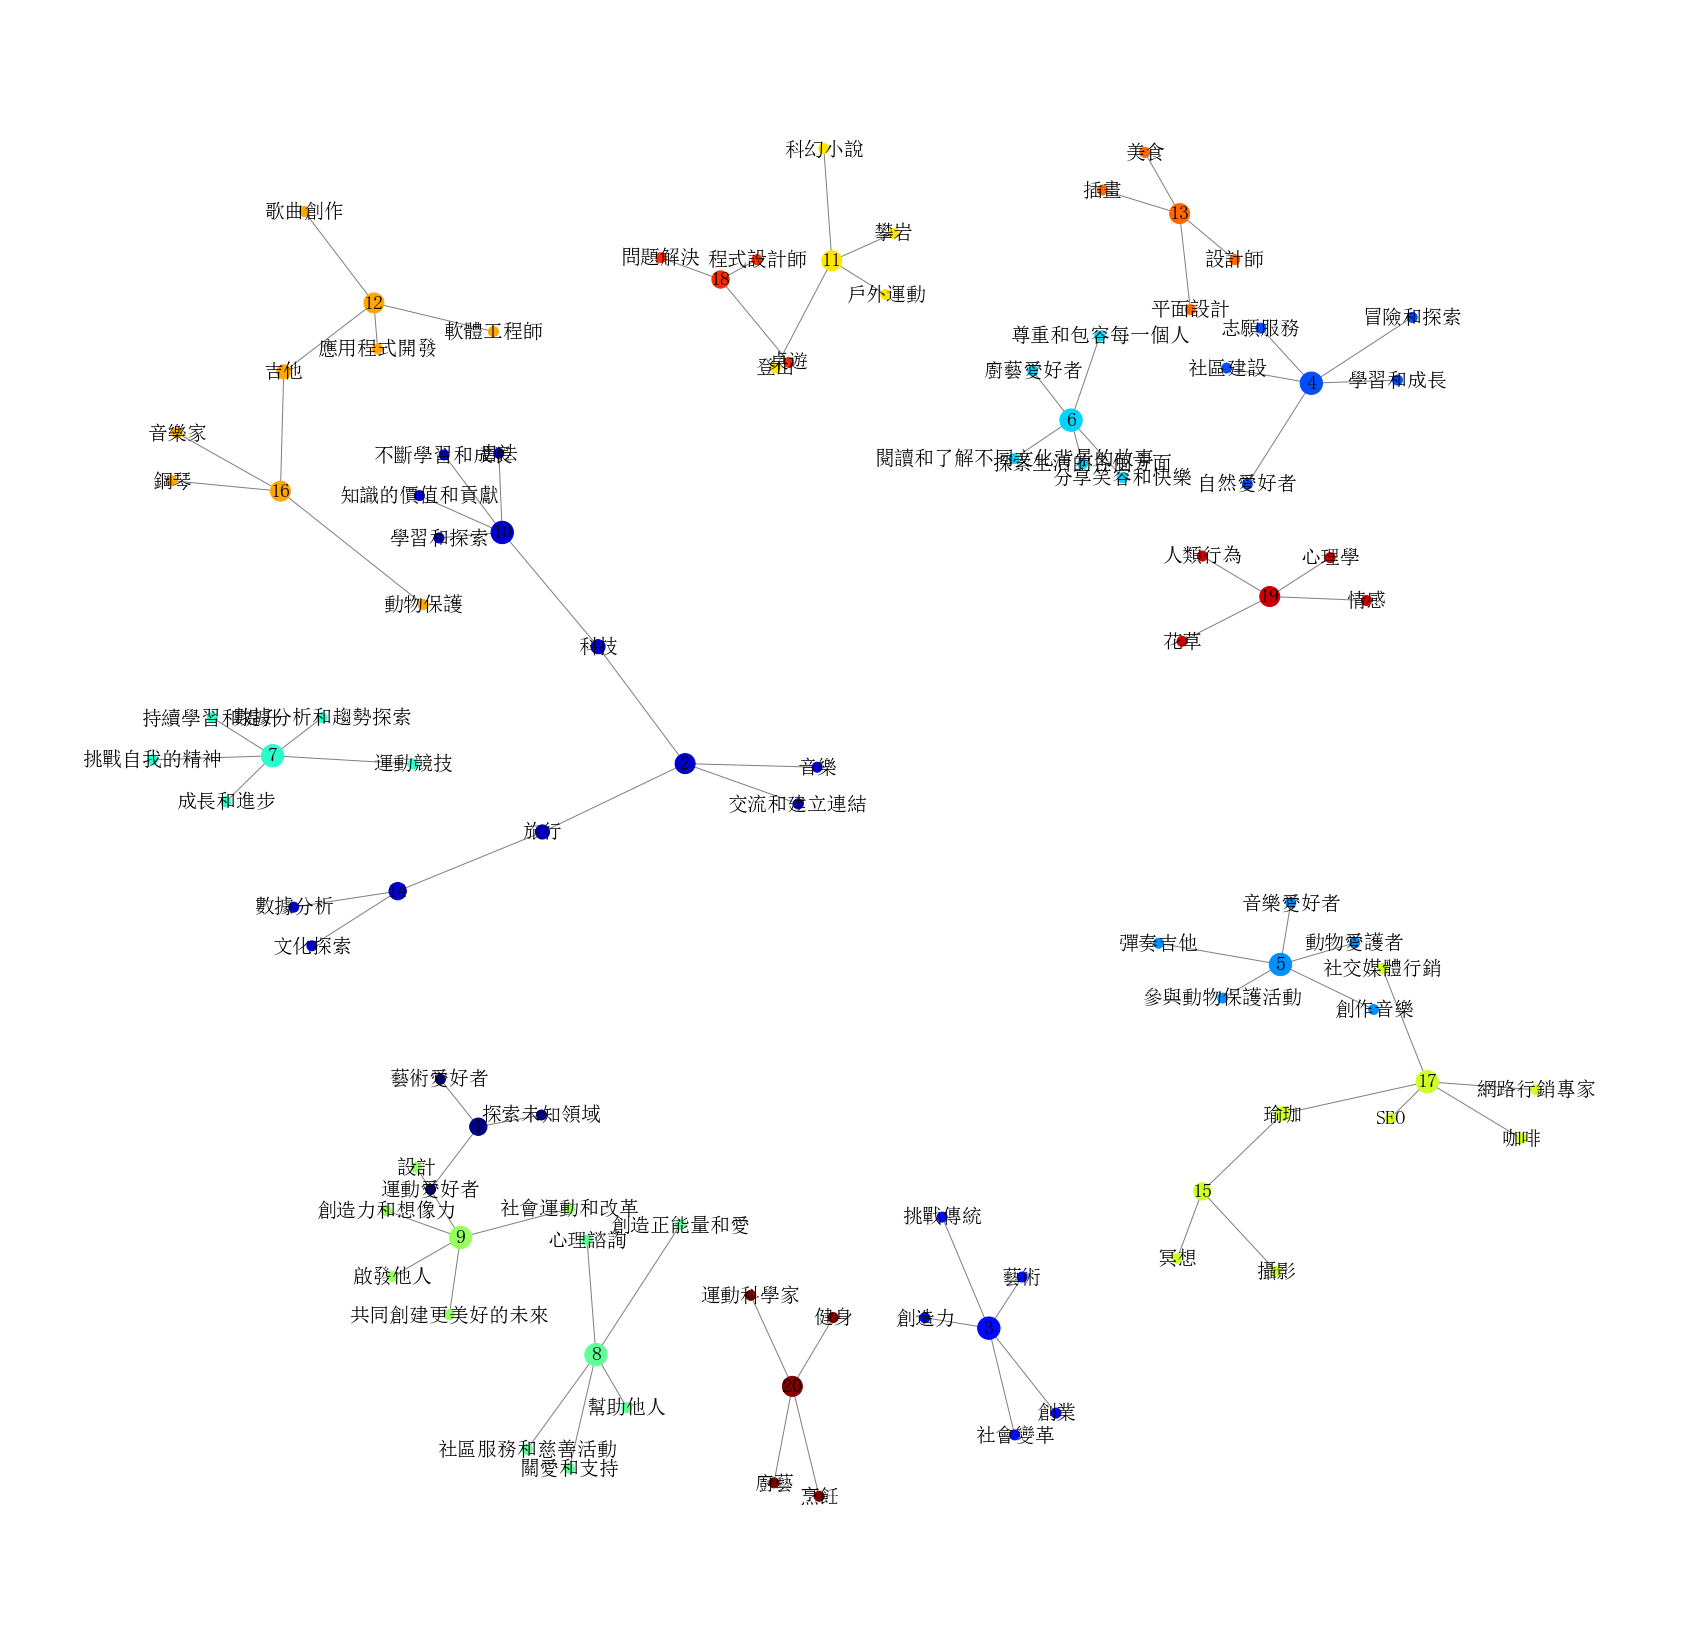

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

partition = community_louvain.best_partition(G)

community_colors = {node: partition[node] for node in G.nodes()}
values = [community_colors[node] for node in G.nodes()]

node_sizes = [100 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.15, iterations=40) 

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=values, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='SimSun')

plt.axis('off')
plt.show()

In [11]:
import pandas as pd

# 加载两个 CSV 文件到 DataFrame
df_persona = pd.read_csv('persona.csv')
df_index = pd.read_csv('index.csv', index_col='key')

# 创建一个新的空列
df_persona['new'] = ""


for index, row in df_persona.iterrows():
    tags = row['標籤'].strip('[]').split('、')  # 去除方括号并拆分标签
    new_tags = []
    for tag in tags:
        if tag in df_index:  # 如果标签存在于 df_index 的索引中
            new_tags.append(df_index.loc[tag, 'index'])  # 根据标签查找对应的领域，添加到新标签列表中
        else:
            new_tags.append(tag)  # 如果标签不存在于 df_index 中，则保持原始标签
    
    
    new_column_value = '、'.join(new_tags)  # 将处理后的标签列表连接成字符串
    df_persona.at[index, 'new'] = new_column_value  # 在新列中存入处理后的字符串

In [12]:
df_persona

,id,原文,標籤,new
0,1,大家好，我是一個充滿好奇心和熱情的人。我喜歡挑戰自己，探索未知領域。我是一位藝術愛好者，喜歡...,藝術愛好者、運動愛好者、 探索未知領域,藝術愛好者、運動愛好者、 探索未知領域
1,2,嗨，大家好！我是一個熱愛交流和建立連結的人。我喜歡與不同背景和文化的人交流，從中學習新的觀點...,交流和建立連結、音樂、科技、旅行,交流和建立連結、音樂、科技、旅行
2,3,大家好，我是一個富有創造力和決心的人。我喜歡挑戰傳統，尋找新的解決方案和機會。我是一個藝術家...,創造力、挑戰傳統、藝術、創業、社會變革,創造力、挑戰傳統、藝術、創業、社會變革
3,4,嗨，大家好！我是一個喜歡冒險和探索的人。我喜歡挑戰自己，突破舒適圈，勇於嘗試新的事物。我是一...,冒險和探索、自然愛好者、社區建設、志願服務、學習和成長,冒險和探索、自然愛好者、社區建設、志願服務、學習和成長
4,5,大家好，我是一個充滿熱情和正能量的人。我喜歡將我的能量和激情帶給身邊的人，讓他們感受到生活的...,音樂愛好者、彈奏吉他、創作音樂、動物愛護者、參與動物保護活動,音樂愛好者、彈奏吉他、創作音樂、動物愛護者、參與動物保護活動
5,6,嗨，大家好！我是一個樂觀開朗的人，總是樂於與人分享笑容和快樂。我喜歡探索生活的各個方面，從...,廚藝愛好者、探索生活的各個方面、閱讀和了解不同文化背景的故事、分享笑容和快樂、尊重和包容每一個人,廚藝愛好者、探索生活的各個方面、閱讀和了解不同文化背景的故事、分享笑容和快樂、尊重和包容每一個人
6,7,大家好，我是一個勇於挑戰和突破自我的人。我喜歡超越自己的極限，追求卓越和成就。我是一個運動健...,挑戰自我的精神、運動競技、數據分析和趨勢探索、成長和進步、持續學習和提升,挑戰自我的精神、運動競技、數據分析和趨勢探索、成長和進步、持續學習和提升
7,8,嗨，大家好！我是一個樂於助人和關心他人的人。我喜歡幫助身邊的人，讓他們感受到我的關愛和支持。...,幫助他人、社區服務和慈善活動、心理諮詢、關愛和支持、創造正能量和愛,幫助他人、社區服務和慈善活動、心理諮詢、關愛和支持、創造正能量和愛
8,9,大家好，我是一個充滿創造力和熱情的人。我喜歡將我的想法和想像力付諸行動，創造出有意義和影響力...,創造力和想像力、設計、社會運動和改革、啟發他人、共同創建更美好的未來,創造力和想像力、設計、社會運動和改革、啟發他人、共同創建更美好的未來
9,10,嗨，大家好！我是一個熱愛學習和探索的人。我喜歡不斷學習新的知識和技能，拓展自己的視野和能力。...,學習和探索、科技、書法、知識的價值和貢獻、不斷學習和成長,學習和探索、科技、書法、知識的價值和貢獻、不斷學習和成長
